In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

In [9]:
fashion_mnist=keras.datasets.fashion_mnist

In [10]:
(img_train,target_train), (img_test,target_test) = fashion_mnist.load_data()
img_train.shape

(60000, 28, 28)

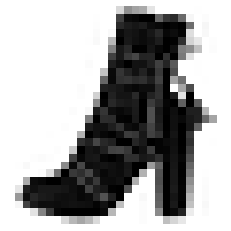

9


(28, 28)

In [11]:
some_item=img_train[11]
plt.imshow(some_item, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(target_train[11])
some_item.shape

In [12]:
img_train_final=img_train.reshape(60000,784)
img_test_final=img_test.reshape(10000,784)

In [13]:
x_train=pd.DataFrame(img_train_final)
y_train=target_train
x_test=pd.DataFrame(img_test_final)
y_test=target_test
print(y_train)
x_train

[9 0 0 ... 3 0 5]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [14]:
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3= GaussianNB()
model4= svm.LinearSVC()
model = VotingClassifier(estimators=[('mdl1', model1), ('mdl2', model2) , ('mdl3',model3),('mdl4',model4)], voting='hard')
model

VotingClassifier(estimators=[('mdl1', LogisticRegression(random_state=42)),
                             ('mdl2', DecisionTreeClassifier(random_state=42)),
                             ('mdl3', GaussianNB()), ('mdl4', LinearSVC())])

In [15]:
scaler=StandardScaler()
x_train_final=scaler.fit_transform(x_train)
x_train_final

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [16]:
model_predict=cross_val_predict(model,x_train_final,y_train)

C:\Users\levi_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\levi_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\levi_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://s

In [17]:
cm = confusion_matrix(y_train,model_predict)
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'])
cm

array([[5030,   47,  118,  303,   31,    8,  386,    0,   77,    0],
       [  25, 5848,   26,   78,    8,    1,   10,    1,    3,    0],
       [ 101,   29, 4592,   81,  814,    1,  347,    1,   34,    0],
       [ 199,  201,   66, 5280,  139,    0,   95,    3,   16,    1],
       [  23,   44,  510,  297, 4849,    0,  252,    1,   24,    0],
       [  10,    5,    4,    3,    1, 5606,    3,  240,   33,   95],
       [1001,   48,  843,  275,  859,    1, 2845,    0,  126,    2],
       [   0,    0,    1,    0,    0,  190,    0, 5685,   13,  111],
       [  48,    8,   35,   73,   31,   34,   79,   23, 5666,    3],
       [   0,    4,    3,    3,    0,  103,    2,  442,   11, 5432]],
      dtype=int64)

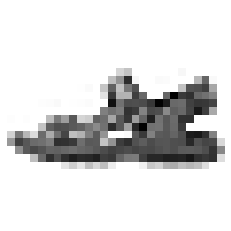

the actual class is 5
the model predicted 5


In [18]:
item_index_predicted=1111
some_item_predicted=img_train[item_index_predicted]
plt.imshow(some_item_predicted, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print("the actual class is",target_train[item_index_predicted])
print("the model predicted",model_predict[item_index_predicted])

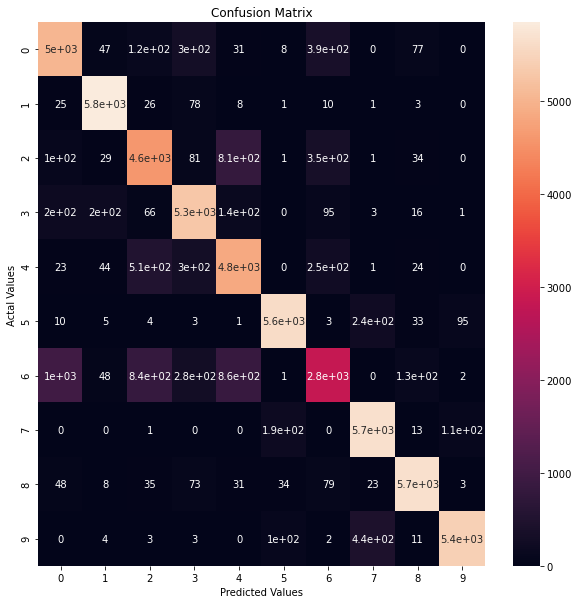

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Understanding the confusion

In [20]:
cl_a, cl_b = 0, 6
X_aa = img_train[(target_train == cl_a) & (model_predict == cl_a)]
X_ab = img_train[(target_train == cl_a) & (model_predict == cl_b)]
X_ba = img_train[(target_train == cl_b) & (model_predict == cl_a)]
X_bb = img_train[(target_train == cl_b) & (model_predict == cl_b)]

In [21]:
def plot_clothes(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

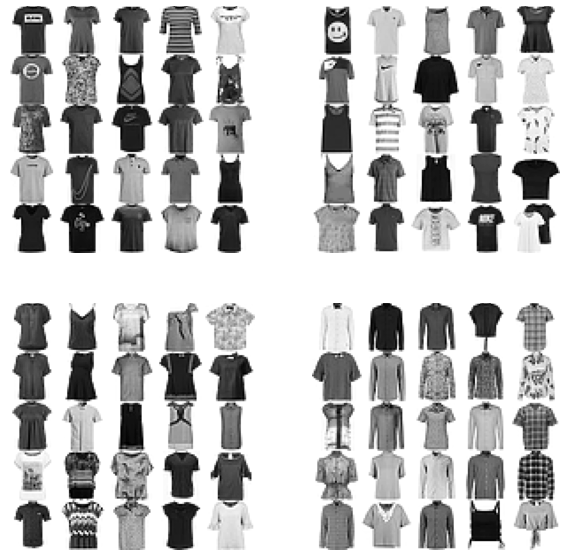

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(221); plot_clothes(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_clothes(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_clothes(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_clothes(X_bb[:25], images_per_row=5)
plt.show()

In [23]:
accuracy_score(y_train,model_predict)

0.8472166666666666

In [24]:
model.fit(x_train_final,y_train)

C:\Users\levi_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\levi_\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


VotingClassifier(estimators=[('mdl1', LogisticRegression(random_state=42)),
                             ('mdl2', DecisionTreeClassifier(random_state=42)),
                             ('mdl3', GaussianNB()), ('mdl4', LinearSVC())])

In [25]:
x_test_final= scaler.transform(x_test)
x_test_final

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [26]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
final_predicts = model.predict(x_test_final)

In [28]:
accuracy_score(final_predicts,y_test)

0.8402